# Part 2: choose one modelling assignment of the two options described below:


# A. Based on the historical sales data provided and recent trends, build a forecasting model and forecast the revenue for the company for the remaining eight months of 2020, which should be an aggregation of individual forecasts by product group (product 1 or, if possible, product 2 in the reference dataset). Present your forecasting model and provide a brief analysis of the results, including whether there are any significant trends relating to certain product groups.

In [2]:
#import the useful libraries.
import pandas as pd
import fbprophet
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder 
#%matplotlib inline


# this will not show a warning
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [3]:
# Read the data set.
custom_date_parser = lambda x: datetime.strptime(x, "%y-%m-%d")
df = pd.read_csv('KPMG Data Scientist case rawdata right dates.csv', parse_dates=['yearmonth'], date_parser = custom_date_parser, sep = ';')
print(df.head(5))

   companyID  county  city  companytype  turnover_class customertype    sni  \
0        127       1   180           81              11           B5  20150   
1        127       1   180           81              11           B5  20150   
2        127       1   180           81              11           B5  20150   
3        127       1   180           81              11           B5  20150   
4        127       1   180           81              11           B5  20150   

   emp_class  customer  yearmonth productcode    sales  
0         14         1 2015-04-01  A-D02-S018   205940  
1         14         1 2015-05-01  A-D02-S042  1088628  
2         14         1 2015-06-01  A-D02-S042   264358  
3         14         1 2015-06-01  A-D03-S072   521313  
4         14         1 2015-06-01  A-D03-S057   795825  


### Preparing data ready for the model 

In [4]:
#Converting date column into datetime column
df['month'] = pd.to_datetime(df['yearmonth'])

In [5]:
df.head()

,companyID,county,city,companytype,turnover_class,customertype,sni,emp_class,customer,yearmonth,productcode,sales,month
0,127,1,180,81,11,B5,20150,14,1,2015-04-01,A-D02-S018,205940,2015-04-01
1,127,1,180,81,11,B5,20150,14,1,2015-05-01,A-D02-S042,1088628,2015-05-01
2,127,1,180,81,11,B5,20150,14,1,2015-06-01,A-D02-S042,264358,2015-06-01
3,127,1,180,81,11,B5,20150,14,1,2015-06-01,A-D03-S072,521313,2015-06-01
4,127,1,180,81,11,B5,20150,14,1,2015-06-01,A-D03-S057,795825,2015-06-01


In [6]:
## converting the productcode into unique number code 
labelencoder = LabelEncoder()
df['new'] = labelencoder.fit_transform(df['productcode'])
df

,companyID,county,city,companytype,turnover_class,customertype,sni,emp_class,customer,yearmonth,productcode,sales,month,new
0,127,1,180,81,11,B5,20150,14,1,2015-04-01,A-D02-S018,205940,2015-04-01,15
1,127,1,180,81,11,B5,20150,14,1,2015-05-01,A-D02-S042,1088628,2015-05-01,35
2,127,1,180,81,11,B5,20150,14,1,2015-06-01,A-D02-S042,264358,2015-06-01,35
3,127,1,180,81,11,B5,20150,14,1,2015-06-01,A-D03-S072,521313,2015-06-01,61
4,127,1,180,81,11,B5,20150,14,1,2015-06-01,A-D03-S057,795825,2015-06-01,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392761,835612,24,2482,49,16,B4,86904,6,1,2019-10-01,A-D02-S023,164250,2019-10-01,20
392762,835612,24,2482,49,16,B4,86904,6,1,2019-11-01,A-D02-S023,4625,2019-11-01,20
392763,835612,24,2482,49,16,B4,86904,6,1,2020-01-01,A-D02-S023,377375,2020-01-01,20
392764,835612,24,2482,49,16,B4,86904,6,1,2020-02-01,A-D02-S023,112875,2020-02-01,20


In [7]:
##Drop all columns and keep the needed. 
df = df[['sales','month','new']] 
df

,sales,month,new
0,205940,2015-04-01,15
1,1088628,2015-05-01,35
2,264358,2015-06-01,35
3,521313,2015-06-01,61
4,795825,2015-06-01,50
...,...,...,...
392761,164250,2019-10-01,20
392762,4625,2019-11-01,20
392763,377375,2020-01-01,20
392764,112875,2020-02-01,20


In [8]:
df['month'] = pd.to_datetime(df['month'])

In [9]:
df.columns = ['y','ds','new']

In [10]:
df

,y,ds,new
0,205940,2015-04-01,15
1,1088628,2015-05-01,35
2,264358,2015-06-01,35
3,521313,2015-06-01,61
4,795825,2015-06-01,50
...,...,...,...
392761,164250,2019-10-01,20
392762,4625,2019-11-01,20
392763,377375,2020-01-01,20
392764,112875,2020-02-01,20


In [11]:
df['ds'] = pd.to_datetime(df['ds'])

### Calling the FACEBOOK machine learning  MODEL for forecasting 

In [12]:
from fbprophet import Prophet

In [13]:
dir(Prophet)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_load_stan_backend',
 'add_country_holidays',
 'add_group_component',
 'add_regressor',
 'add_seasonality',
 'construct_holiday_dataframe',
 'fit',
 'flat_growth_init',
 'flat_trend',
 'fourier_series',
 'initialize_scales',
 'linear_growth_init',
 'logistic_growth_init',
 'make_all_seasonality_features',
 'make_future_dataframe',
 'make_holiday_features',
 'make_seasonality_features',
 'parse_seasonality_args',
 'percentile',
 'piecewise_linear',
 'piecewise_logistic',
 'plot',
 'plot_components',
 'predict',
 'predict_seasonal_components',
 'predict_trend',
 'predict_uncertainty',
 'predictive_samples',
 'regressor_col

In [14]:
# Initialize the Model
model=Prophet()

In [15]:
df.columns

Index(['y', 'ds', 'new'], dtype='object')

In [16]:
df.dropna(axis=0,inplace=True)

In [17]:
df.head()

,y,ds,new
0,205940,2015-04-01,15
1,1088628,2015-05-01,35
2,264358,2015-06-01,35
3,521313,2015-06-01,61
4,795825,2015-06-01,50


In [18]:
model.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -15.288


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
Error evaluating model log probability: Non-finite gradient.

      99   1.69779e+06   2.70544e-05       32383.8           1           1      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199    1.6978e+06   0.000167063       14436.4           1           1      231   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     244    1.6978e+06   5.54724e-06       3113.28      0.9318      0.9318      277   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


In [19]:
### Create future dates of 365 days
future_dates=model.make_future_dataframe(periods=365)

In [20]:
prediction=model.predict(future_dates)

In [21]:
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-01,35221.224415,-196962.048975,256260.102963,35221.224415,35221.224415,7282.511650,7282.511650,7282.511650,7282.511650,7282.511650,7282.511650,0.0,0.0,0.0,42503.736066
1,2015-02-01,35652.856450,-177974.048406,289354.705069,35652.856450,35652.856450,15494.985890,15494.985890,15494.985890,15494.985890,15494.985890,15494.985890,0.0,0.0,0.0,51147.842340
2,2015-03-01,36401.802712,-170096.241926,275606.806720,36401.802712,36401.802712,9434.703619,9434.703619,9434.703619,9434.703619,9434.703619,9434.703619,0.0,0.0,0.0,45836.506330
3,2015-04-01,37230.993215,-186476.270492,286599.460418,37230.993215,37230.993215,-1988.976128,-1988.976128,-1988.976128,-1988.976128,-1988.976128,-1988.976128,0.0,0.0,0.0,35242.017087
4,2015-05-01,37634.127794,-192014.018694,256973.337001,37634.127794,37634.127794,-4815.468008,-4815.468008,-4815.468008,-4815.468008,-4815.468008,-4815.468008,0.0,0.0,0.0,32818.659787


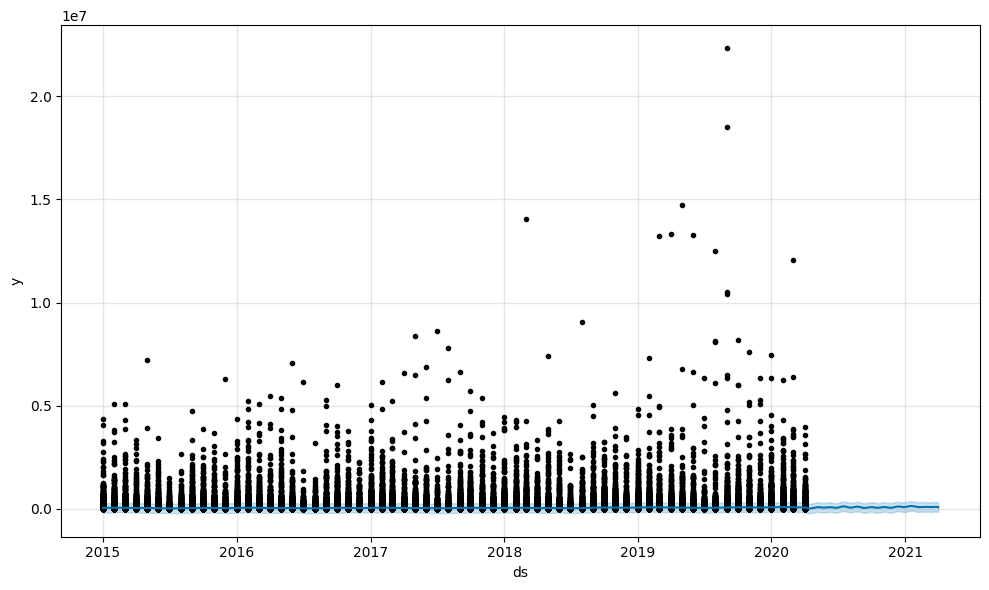

In [22]:
### plot the predicted projection
model.plot(prediction);


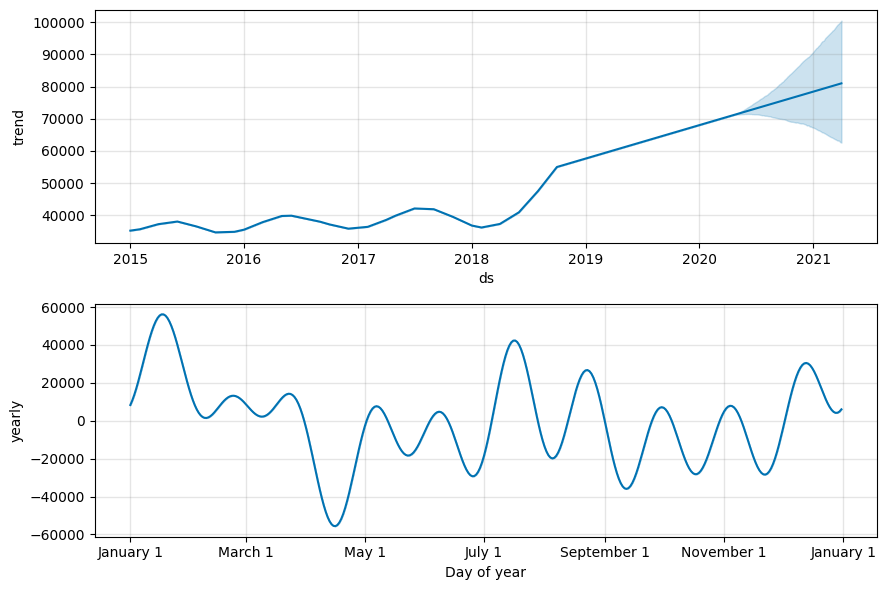

In [23]:
#### Visualize Each Components[Trends,yearly]
model.plot_components(prediction);

# Prediction of model for year 2020 

In [24]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(model, initial='1095 days', period='180 days', horizon = '365 days')
df_cv.head()

INFO:fbprophet:Making 3 forecasts with cutoffs between 2018-04-07 00:00:00 and 2019-04-02 00:00:00
  0%|          | 0/3 [00:00<?, ?it/s]

Initial log joint probability = -17.7618
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
Error evaluating model log probability: Non-finite gradient.

      76   1.13379e+06   8.25714e-06       2053.77           1           1      100   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


 33%|███▎      | 1/3 [00:33<01:06, 33.22s/it]

Initial log joint probability = -19.9142
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
Error evaluating model log probability: Non-finite gradient.

      99   1.28136e+06   0.000150411       23827.4           1           1      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     145   1.28136e+06   7.80697e-06       2577.29      0.9668      0.9668      169   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


 67%|██████▋   | 2/3 [01:07<00:33, 33.72s/it]

Initial log joint probability = -23.8437
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
Error evaluating model log probability: Non-finite gradient.

      99   1.36874e+06   5.82908e-06        4634.4           1           1      126   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     156   1.36874e+06   3.88167e-05       3487.87      0.4219      0.9193      186   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


100%|██████████| 3/3 [01:43<00:00, 34.53s/it]


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2018-05-01,35812.195563,-145800.613546,214465.871655,29490,2018-04-07
1,2018-05-01,35812.195563,-137987.065569,221115.532834,14340,2018-04-07
2,2018-05-01,35812.195563,-137674.019398,217437.480782,13735,2018-04-07
3,2018-05-01,35812.195563,-142822.822586,225408.779153,2602375,2018-04-07
4,2018-05-01,35812.195563,-153087.378013,221668.057373,74645,2018-04-07


In [25]:
##Performance metrics for the mdodel 

In [26]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,29 days,4.507051e+10,212298.151513,57739.158443,15.654781,2.345371,0.964726
1,55 days,4.078872e+10,201962.166753,55975.095639,15.435582,2.344192,0.967146
2,58 days,3.630669e+10,190543.152144,52409.902098,16.308207,2.370955,0.971093
3,60 days,3.439100e+10,185448.108381,52000.987697,15.975692,2.346240,0.972826
4,85 days,3.216213e+10,179338.033886,48261.874907,16.734502,2.391865,0.974948


In [27]:
## Visualisations plot to show the RMSE curve for next year  

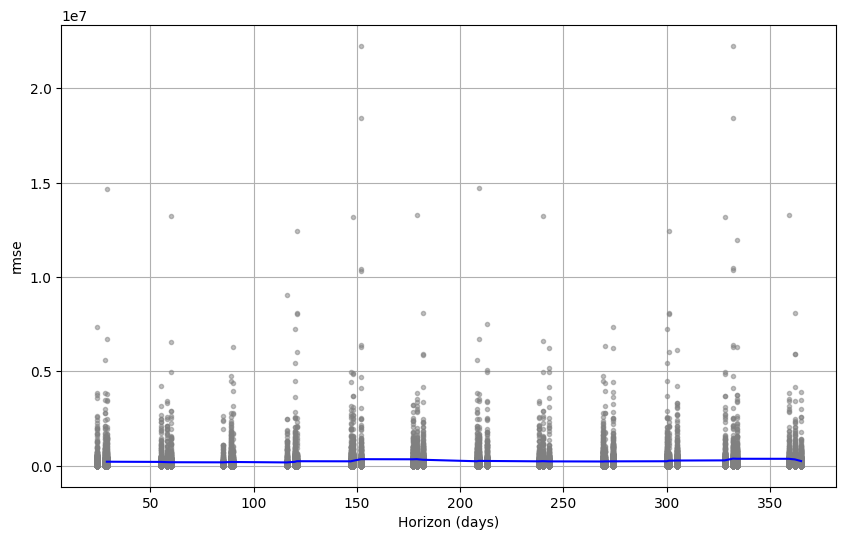

In [28]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='rmse')

## Future steps
1. Apply other deep learning models like RNN or LSTM to see if model is performing differently
2. To see if there are any trends related to seasonality for specific producsts, for that we need seasonal data
3. Could also apply prediction day or week wise. 